In [2]:
import pandas as pd
from datautils import _get_time_features,load_forecast_csv

In [3]:
data, train_slice, valid_slice, test_slice, scaler, pred_lens, n_covariate_cols,data1=load_forecast_csv("mocap_x1",False)

data
(1285, 1)
dt_embed
(1285, 7)
[[ 0.  0.  6. ...  1.  1. 52.]
 [ 0.  1.  6. ...  1.  1. 52.]
 [ 0.  2.  6. ...  1.  1. 52.]
 ...
 [ 0. 10.  3. ... 54.  2.  8.]
 [ 0. 11.  3. ... 54.  2.  8.]
 [ 0. 12.  3. ... 54.  2.  8.]]
7
(1285, 1)
data
(1285, 1)
slice(None, 771, None)
slice(771, 1028, None)
slice(1028, None, None)
(1, 1285, 1)
StandardScaler()
(1285, 7)
(1, 1285, 7)
(1, 1285, 1)
1
(1, 1285, 8)


In [4]:
data.shape

(1, 1285, 8)

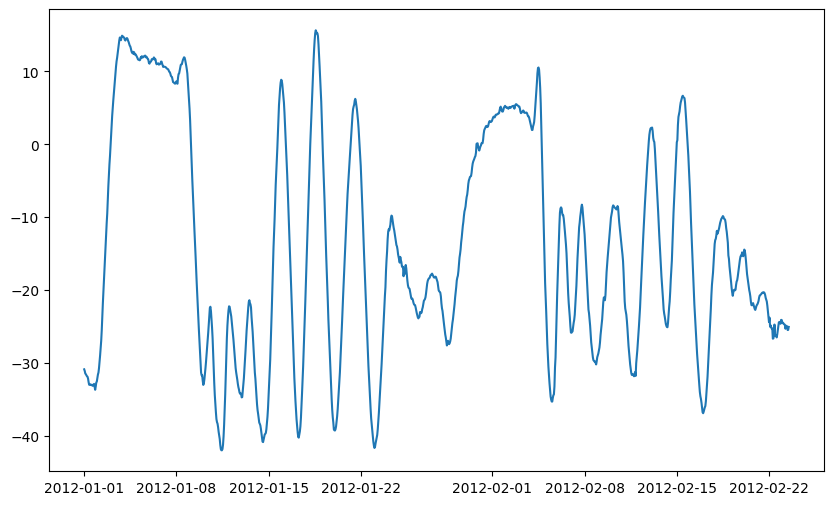

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(data1)

In [6]:
data.shape[-1]

8

In [5]:
from ts2vec import TS2Vec
model = TS2Vec(
    input_dims=data.shape[-1],
    device="cpu",
    # output_dims=320
    output_dims=10
)
loss_log = model.fit(
    data,
    verbose=True,
    n_iters=400
)

Epoch #0: loss=5.086809158325195
Epoch #1: loss=2.1818430423736572
Epoch #2: loss=3.007899761199951
Epoch #3: loss=2.421621799468994
Epoch #4: loss=1.1978003978729248
Epoch #5: loss=3.0426173210144043
Epoch #6: loss=0.704642117023468
Epoch #7: loss=2.0579631328582764
Epoch #8: loss=2.331031322479248
Epoch #9: loss=2.463587522506714
Epoch #10: loss=1.762887716293335
Epoch #11: loss=1.528359055519104
Epoch #12: loss=1.1742699146270752
Epoch #13: loss=2.226778507232666
Epoch #14: loss=2.2857396602630615
Epoch #15: loss=2.2508463859558105
Epoch #16: loss=2.112621307373047
Epoch #17: loss=2.1899359226226807
Epoch #18: loss=2.1501803398132324
Epoch #19: loss=1.688089370727539
Epoch #20: loss=2.048706293106079
Epoch #21: loss=2.004476547241211
Epoch #22: loss=1.5380560159683228
Epoch #23: loss=1.592441201210022
Epoch #24: loss=1.8190484046936035
Epoch #25: loss=2.1223087310791016
Epoch #26: loss=2.022956609725952
Epoch #27: loss=1.841940999031067
Epoch #28: loss=1.724516749382019
Epoch #29: l

In [6]:
model.save(f'mocap_x1_400.pkl')

In [7]:
all_repr = model.encode(
        data,
        causal=True,
        sliding_length=1,
        sliding_padding= 200,
        batch_size=256
    )

In [8]:
test_repr = all_repr[:, test_slice]
print(test_repr)

[[[-0.15215355  0.12550706 -0.02017685 ...  0.08371142  0.43059087
    0.2687045 ]
  [-0.14683415  0.12667483 -0.0244996  ...  0.08221477  0.42969322
    0.26834923]
  [-0.14235546  0.12660313 -0.02845157 ...  0.08061972  0.42886424
    0.26806262]
  ...
  [-0.15169764 -0.06415994  0.07585276 ... -0.11543173  0.20572136
    0.18542561]
  [-0.14837556 -0.06575081  0.07331736 ... -0.11565927  0.20855704
    0.18748173]
  [-0.14116037 -0.06460413  0.07165457 ... -0.11403423  0.21066263
    0.18780418]]]


In [9]:
all_repr.shape

(1, 1285, 10)

In [10]:
test_repr.shape

(1, 257, 10)

In [11]:
test_2d = all_repr.reshape(1285, 10)

In [12]:
from sklearn.cluster import DBSCAN

In [13]:
import numpy as np
data_test=data1

In [14]:
data_test.shape

(1285, 1)

In [15]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [16]:
dbscan.fit(test_2d)
labels = dbscan.labels_

In [17]:
date=data_test.index
date_list=date.tolist()

/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_96330/583540433.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


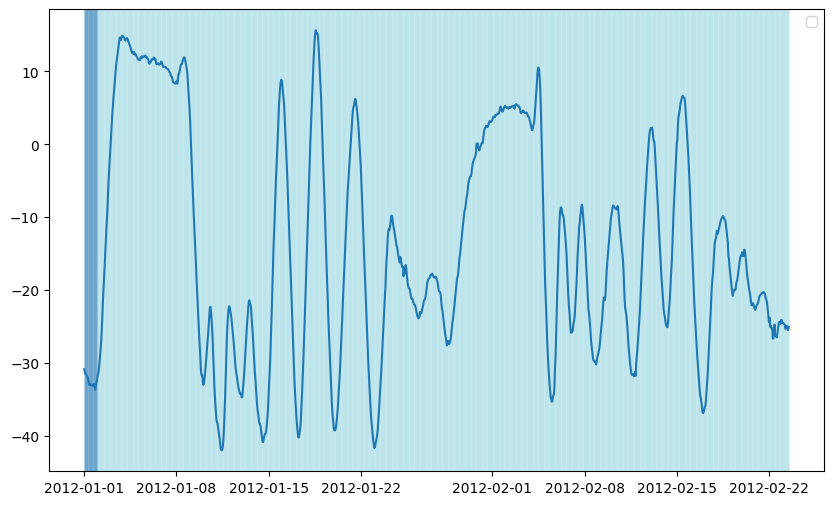

In [18]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test)  # cパラメータにクラスタラベルを渡す
for i in range(len(date_list)-1):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.2)
plt.legend() 
plt.show()

In [19]:
# import matplotlib.cm as cm
# from matplotlib.colors import ListedColormap
# cmap = cm.Set1
# # ラベルの一覧を取得します
# num_clusters = len(set(labels))  # クラスタの数
# cmap = cm.get_cmap('tab20', num_clusters) 
# plt.figure(figsize=(10, 6))
# # 各ラベルごとにプロットします
# for label in set(labels):
#     plt.plot(data_test[labels == label], label=f'Cluster {label}',c=cmap(label))

# #plt.legend()  # 凡例を表示します
# plt.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering

# AgglomerativeClusteringオブジェクトの作成。ここではクラスタ数を3としています。
agg_clustering = AgglomerativeClustering(n_clusters=5)

# フィッティングとラベルの予測を行います
agg_clustering.fit(test_2d)
labels = agg_clustering.labels_

/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_96330/1211746902.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


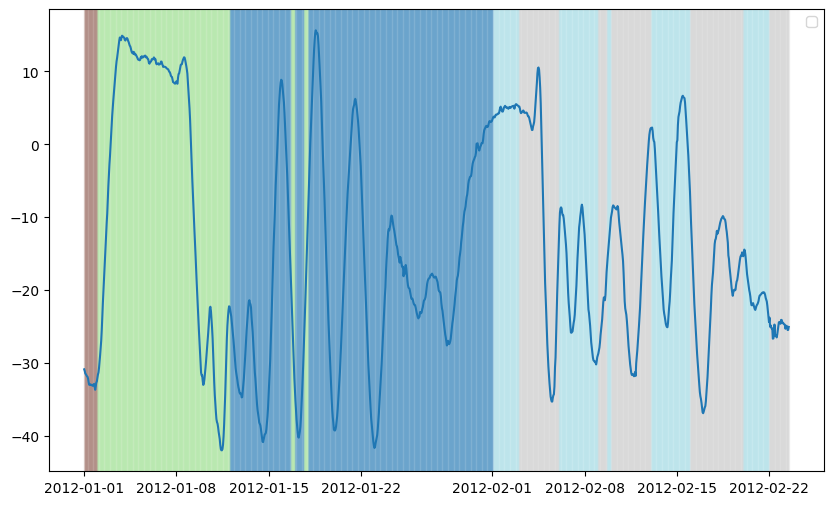

In [21]:
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test)  # cパラメータにクラスタラベルを渡す
for i in range(len(date_list)-1):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.2)
plt.legend() 
plt.show()

In [22]:
from sklearn.cluster import KMeans

# KMeansオブジェクトの作成。ここではクラスタ数（k）を3としています。
kmeans = KMeans(n_clusters=5)

# フィッティングとラベルの予測を行います
kmeans.fit(test_2d)
labels = kmeans.labels_

/Users/katoutsubasa/anaconda3/envs/tstest/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_96330/3583795887.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


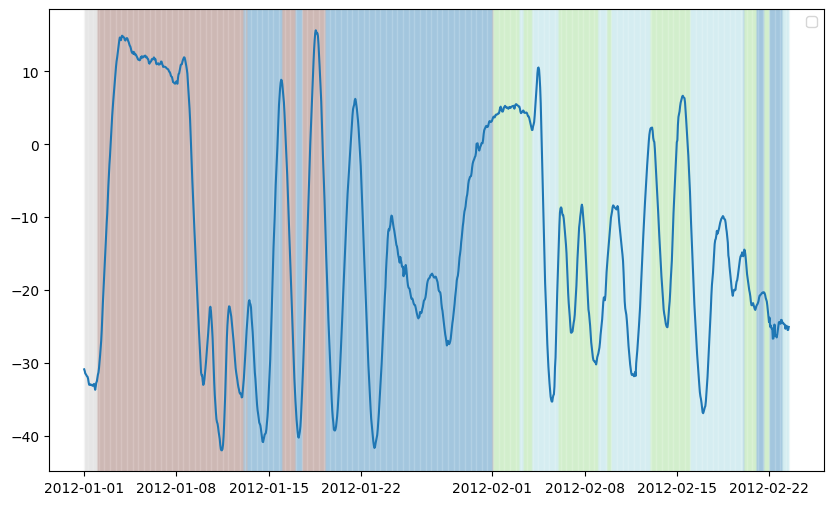

In [23]:
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test)  # cパラメータにクラスタラベルを渡す
for i in range(len(date_list)-1):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.1)
plt.legend() 
plt.show()

In [25]:
from sklearn.cluster import KMeans

# KMeansオブジェクトの作成。ここではクラスタ数（k）を3としています。
kmeans = KMeans(n_clusters=4)

# フィッティングとラベルの予測を行います
kmeans.fit(test_2d)
labels = kmeans.labels_

/Users/katoutsubasa/anaconda3/envs/tstest/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_96105/3583795887.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


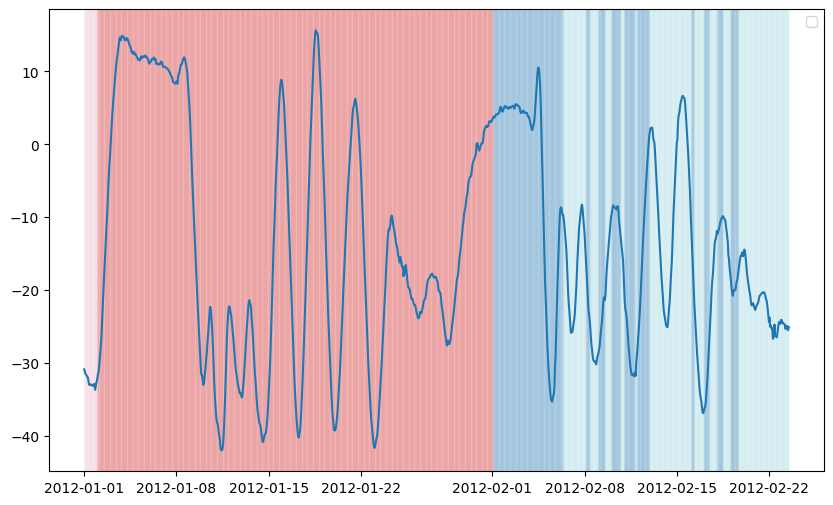

In [26]:
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test)  # cパラメータにクラスタラベルを渡す
for i in range(len(date_list)-1):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.1)
plt.legend() 
plt.show()

In [24]:
# KMeansオブジェクトの作成。ここではクラスタ数（k）を3としています。
kmeans = KMeans(n_clusters=3)

# フィッティングとラベルの予測を行います
kmeans.fit(test_2d)
labels = kmeans.labels_

/Users/katoutsubasa/anaconda3/envs/tstest/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_96330/3583795887.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


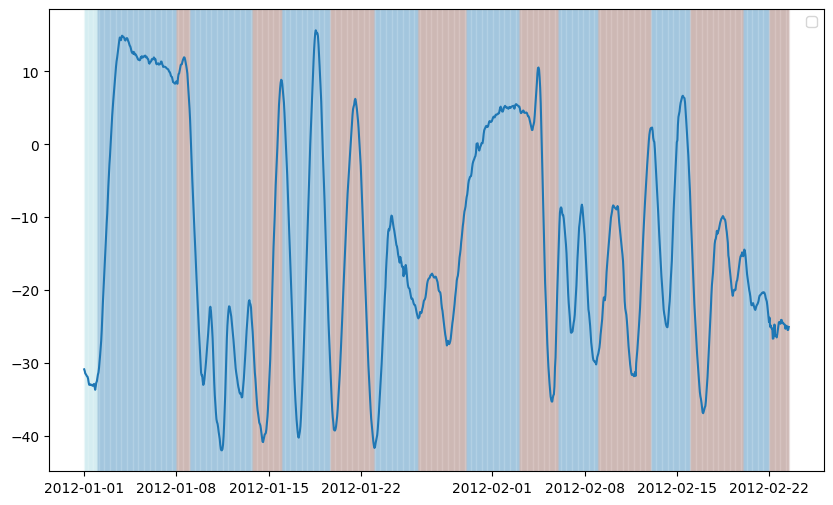

In [25]:
cmap = cm.Set1
# ラベルの一覧を取得します
num_clusters = len(set(labels))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
plt.figure(figsize=(10, 6))
plt.plot(data_test)  # cパラメータにクラスタラベルを渡す
for i in range(len(date_list)-1):
    plt.axvspan(date_list[i], date_list[i+1], color=cmap(labels[i]), alpha=0.1)
plt.legend() 
plt.show()

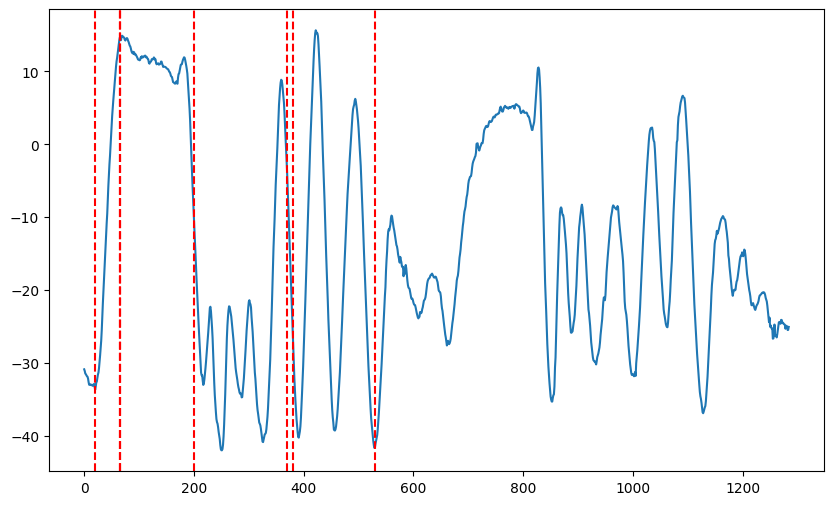

In [26]:
# 日付をエポック秒に変換
data_test_copy=data_test.copy()
# dateを1,2,3,...に変更
data_test_copy.reset_index(drop=True, inplace=True)
#data_test_copy['date'] = range(1, len(data_test_copy) + 1)
data_test_copy
plt.figure(figsize=(10, 6))
plt.plot(data_test_copy) 
plt.axvline(x=19, color='r', linestyle='--')
plt.axvline(x=200, color='r', linestyle='--')
plt.axvline(x=370, color='r', linestyle='--')
plt.axvline(x=530, color='r', linestyle='--')
plt.axvline(x=380, color='r', linestyle='--')
plt.axvline(x=66, color='r', linestyle='--')
plt.axvline(x=66, color='r', linestyle='--')
plt.axvline(x=66, color='r', linestyle='--')



/var/folders/m9/vc40_2nj7wgb3tgln7x3gdzc0000gn/T/ipykernel_96330/1855845376.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_clusters)


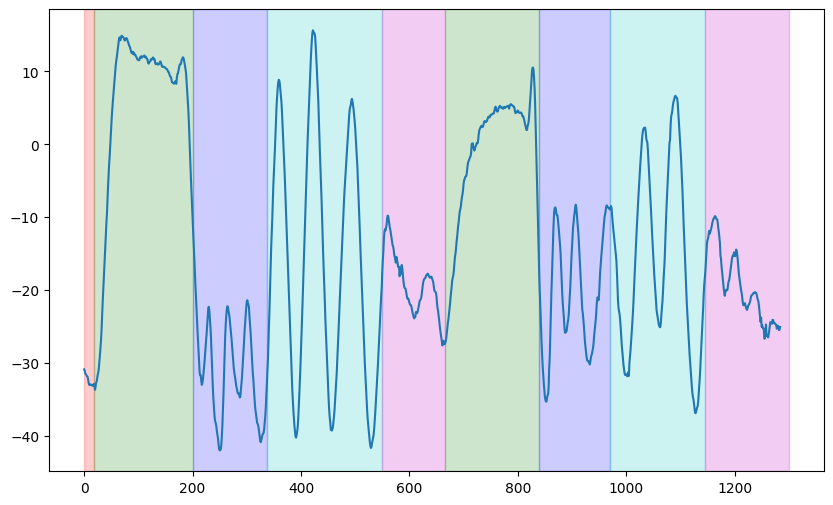

In [27]:
# 日付をエポック秒に変換
data_test_copy=data_test.copy()
# dateを1,2,3,...に変更
data_test_copy.reset_index(drop=True, inplace=True)
#data_test_copy['date'] = range(1, len(data_test_copy) + 1)
data_test_copy
plt.figure(figsize=(10, 6))

regime_list=[0,19,200,338,550,665,840,970,1145,1300]
colors =  ["r", "g", "b", "c", "m", "g", "b", "c","m","y"]
plt.plot(data_test_copy) 
num_clusters = len(set(regime_list))  # クラスタの数
cmap = cm.get_cmap('tab20', num_clusters) 
for i in range(len(regime_list)-1):
    plt.axvspan(regime_list[i], regime_list[i+1], color=colors[i], alpha=0.2)

In [28]:
from sklearn.manifold import TSNE
regime_list=[0,19,200,338,550,665,840,970,1145,1300]
# t-SNEのモデルを作成
tsne = TSNE(n_components=3, random_state = 0, perplexity = 30, n_iter = 10000)

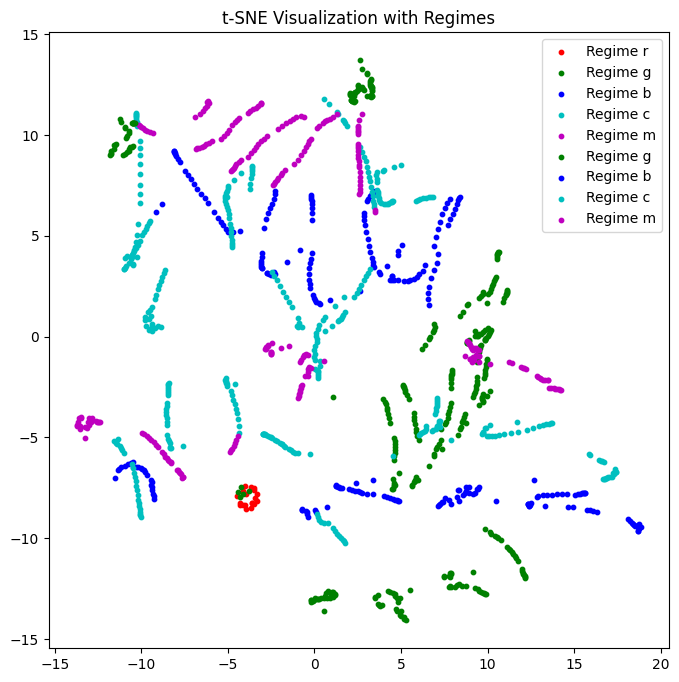

In [29]:
# 高次元データを低次元に変換
data_tsne = tsne.fit_transform(test_2d)
regime_label=[0,1,2,3,4,1,2,3,4,5]

# 各regimeごとに色を指定
colors =  ["r", "g", "b", "c", "m", "g", "b", "c","m","y"]

# プロット
plt.figure(figsize=(8, 8))

for i in range(len(regime_list) - 1):
    start_idx = regime_list[i]
    end_idx = regime_list[i + 1]
    plt.scatter(
        data_tsne[start_idx:end_idx, 0],
        data_tsne[start_idx:end_idx, 1],
        color=colors[i],
        label=f"Regime {colors[i]}",
        s=10
    )
plt.title("t-SNE Visualization with Regimes")
plt.legend()
plt.show()

In [30]:
from sklearn.manifold import TSNE
regime_list=[0,19,200,338,550,665,840,970,1145,1300]
# t-SNEのモデルを作成
tsne = TSNE(n_components=2, random_state = 0, perplexity = 30, n_iter = 10000)

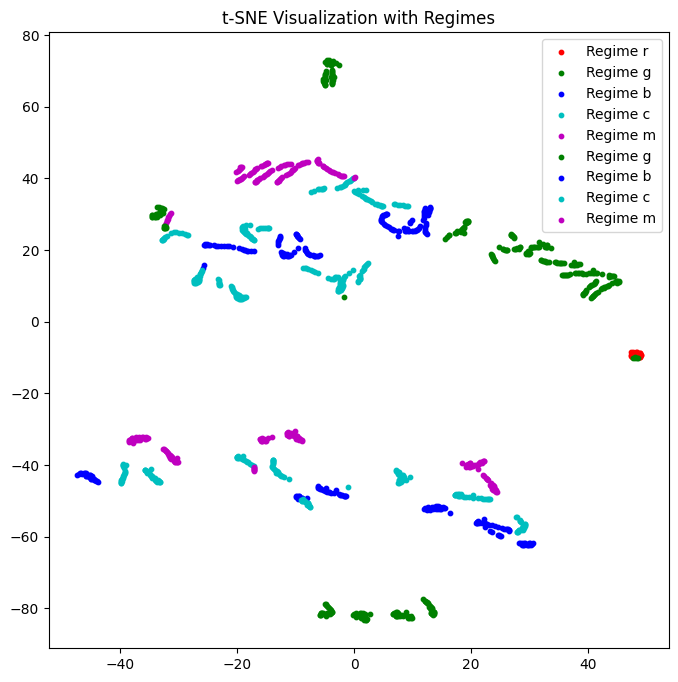

In [31]:
# 高次元データを低次元に変換
data_tsne = tsne.fit_transform(test_2d)
regime_label=[0,1,2,3,4,1,2,3,4,5]

# 各regimeごとに色を指定
colors =  ["r", "g", "b", "c", "m", "g", "b", "c","m","y"]

# プロット
plt.figure(figsize=(8, 8))

for i in range(len(regime_list) - 1):
    start_idx = regime_list[i]
    end_idx = regime_list[i + 1]
    plt.scatter(
        data_tsne[start_idx:end_idx, 0],
        data_tsne[start_idx:end_idx, 1],
        color=colors[i],
        label=f"Regime {colors[i]}",
        s=10
    )
plt.title("t-SNE Visualization with Regimes")
plt.legend()
plt.show()